1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

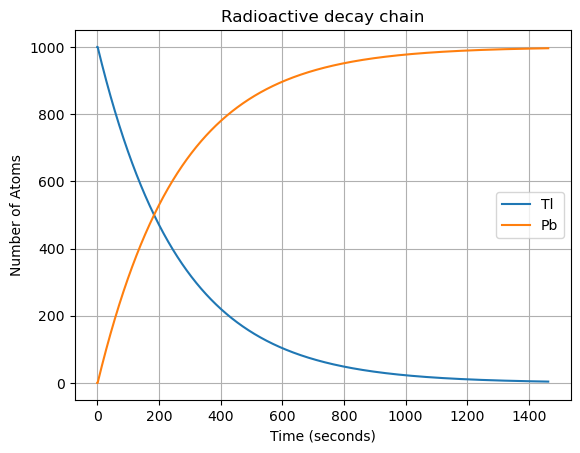

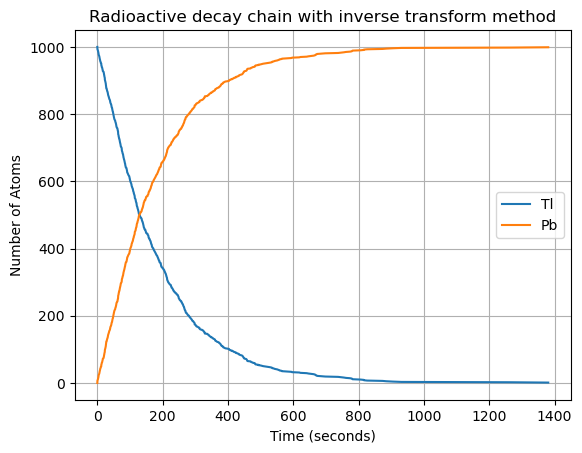

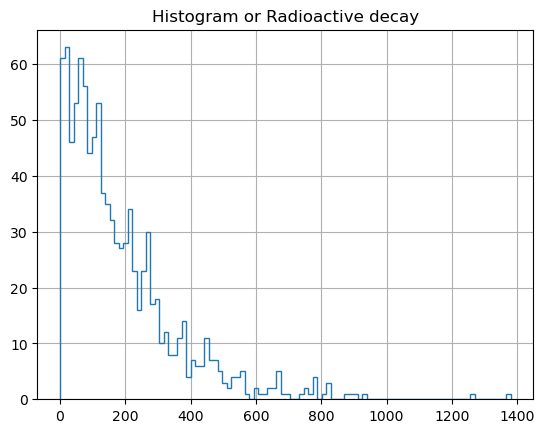

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
tau = 3.052 * 60 # Convert half-life to seconds
tot_tl = 1000
tot_pb = 0


time_step = np.arange(int(tau)*8)

#define the decay function
def decay_prob(t):
    return 1 - 2**(-t/tau)

tl_t = [1000, ]
pb_t = [0, ]

for i in range(len(time_step)-1):
    dec_tl = decay_prob(time_step[i]) *  tot_tl
    tl_t.append(tot_tl - dec_tl)
    pb_t.append(tot_pb + dec_tl)
    
#plot the graph
plt.figure()
plt.plot(time_step, tl_t, label='Tl')
plt.plot(time_step, pb_t, label='Pb')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.title('Radioactive decay chain')
plt.grid()
plt.legend()


#the inverse transform method

# generate random numbers following the non-uniform probability distribution
num_atoms = 1000
decay_times = -tau * np.log(np.random.rand(num_atoms))

# sort the decay times
decay_times = np.sort(decay_times)

# calculate the number of atoms that have not decayed at each time
atoms_remaining = num_atoms - np.arange(num_atoms)
atoms_pb = np.arange(num_atoms)


# plot the number of atoms that have not decayed as a function of time
plt.figure()
plt.plot(decay_times, atoms_remaining, label='Tl' )
plt.plot(decay_times, atoms_pb, label='Pb')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.title('Radioactive decay chain with inverse transform method')
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.hist(decay_times, histtype='step', bins=100, density=False, linewidth=1)
plt.grid()
plt.title("Histogram or Radioactive decay")
plt.show()



2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

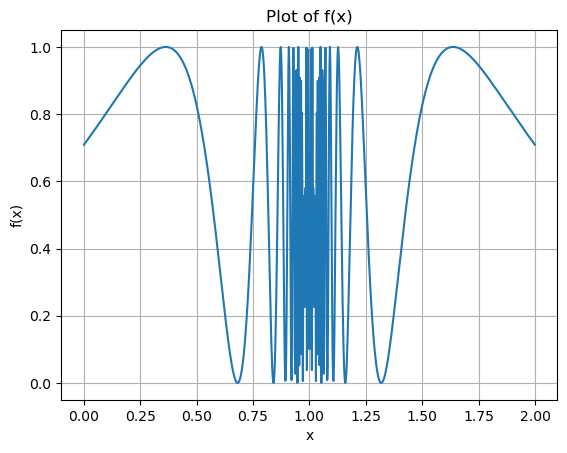

Integral with hit and miss: 1.34996
Mean with hit and miss:  1.3468138000000003 
Std with hit and miss:  0.0030183262845491095 

Integral with mean value method: 1.346 +- 0.002


Text(0.5, 1.0, 'How $\\sigma$ varies with N in the mean value method ')

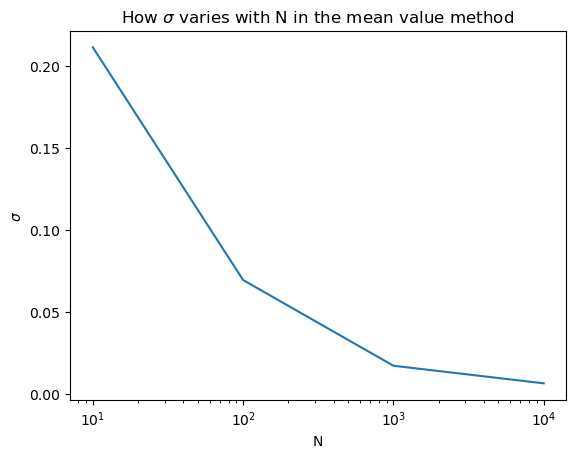

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(1 / (1-x))**2

x=np.linspace(0.001, 1.999, 1000)

plt.figure()
plt.plot(x, f(x))
plt.grid()
plt.title("Plot of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

#hit and miss method
N = 100000
count = 0
a, b, h = 0, 1, 2

def hit_miss(N,a,b,h):
    count = 0
    for i in range(N):
        x = h * np.random.random() # x is random uniform between 0 and 2
        y = (b - a) * np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    return count / N * h * (b - a)
    
print("Integral with hit and miss:", hit_miss(N,a,b,h))

I_err = np.zeros(100)
for i in range(100):
    I_err[i] = hit_miss(N,a,b,h)
mean_hit_miss = np.mean(I_err)
std_hit_miss = np.std(I_err)
print('Mean with hit and miss: ', mean_hit_miss, '\nStd with hit and miss: ', std_hit_miss, '\n')


# mean value method
N = 100000
a, b = 0, 2
def mean_value(x_min, x_max, n):
    xi = np.random.uniform(x_min, x_max, n)
    yi = np.array([f(xii) for xii in xi])
    s = np.sum(yi)
    integ = (x_max - x_min) / n * s
    return integ

integr = mean_value(a, b, N)

M = 100

def calc_sigma(x_min, x_max, n, m):
    # Calculate the integral m times
    integrs = np.array([mean_value(x_min, x_max, n) for mi in np.arange(m)])
    # Estimate sigma^2 as <I^2> - <I>^2
    sigma = np.sqrt(np.mean(integrs**2) - np.mean(integrs)**2)
    return sigma

sigma = calc_sigma(a, b, N, M)
print("Integral with mean value method: %.3f +- %.3f" % (integr, sigma))

Ns = np.array([10, 100, 1000, 10000])

sigmas = np.array([calc_sigma(a, b, ni, M) for ni in Ns])

plt.plot(Ns, sigmas)
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\sigma$')
plt.title('How $\sigma$ varies with N in the mean value method ')



3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [29]:
import numpy as np
from scipy.integrate import dblquad
from scipy.integrate import tplquad

N = 10000

def area_circle():
    sum_tot = 0
    for i in range(N):
    
        x =  2*np.random.random()-1
        y =  2*np.random.random()-1
     
        if x**2+y**2<=1:
            sum_tot = sum_tot + 1
            
    return ((2**2)/N)*sum_tot
print("Area =", area_circle())

#area in 10D

def area_circle_10D():
    sum_tot = 0
    for i in range(N):
        s = 0
        for x in range(10):
            s+= ((np.random.random())**2)
        if (s <= 1):
            sum_tot = sum_tot + 1;
    return (2**10)*(sum_tot/N)

print("Area in 10D =", area_circle_10D())


Area = 3.1492
Area in 10D = 1.7408


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [9]:
import numpy as np
from scipy import integrate
import math

N = 100000

#define the function
def f(x):
    return x**-0.5/((np.exp(x)+1.0))

#weight function
def w(x):
    return 1/np.sqrt(x)

def int(x,a,b):
    return (2*math.sqrt(b) - 2*math.sqrt(a))

int_vect = []
for i in range(N):
    x = np.random.uniform(0,1) ** 2
    int_vect = np.append(int_vect, (f(x)/w(x)))

estimate = (sum(int_vect)/N)*int(x,0,1)
    
print('Estimate: with sampling', estimate)

result, error = integrate.quad(f, 0, 1)
print('Exact result:', result)

Estimate: with sampling 0.8384536288607647
Exact result: 0.8389329600133838
